In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Gerando dados sintéticos
np.random.seed(42)
n_samples = 100
area = np.random.uniform(50, 200, n_samples)
preco = 100000 + 500 * area + 50 * (area - 125)**2 + np.random.normal(0, 10000, n_samples)

df = pd.DataFrame({'area': area, 'preco': preco})
df.head()

,area,preco
0,106.181018,171668.684097
1,192.607146,421849.808729
2,159.799091,241365.991068
3,139.798773,160973.880736
4,73.402796,267618.251843


Coeficientes (Equação Normal): [221096.69426635    292.18651421]
Coeficientes (sklearn): [221096.69426635    292.18651421]
Coeficientes (Polinomial): 898285.6153130913 [-12291.90873637     51.07619575]
MSE (Linear): 6295639973.352308
R2 (Linear): -0.04283010202746729
MSE (Polinomial): 63584060.72820638
R2 (Polinomial): 0.989467731189017


c:\Users\eduya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


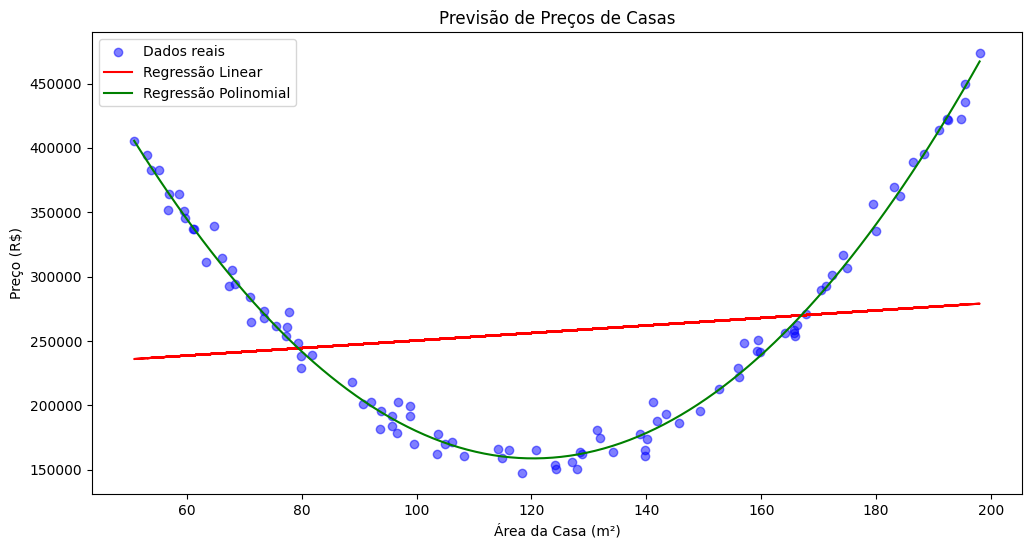


Interpretação do Modelo Linear:
Intercepto: R$ 221096.69
Coeficiente de área: R$ 292.19 por m²
Isso significa que, em média, para cada m² adicional, o preço aumenta em R$ 292.19

Interpretação do Modelo Polinomial:
Intercepto: R$ 898285.62
Coeficiente de área: R$ -12291.91 por m²
Coeficiente de área²: R$ 51.08 por m²
O termo quadrático captura a não-linearidade na relação entre área e preço.


In [3]:

# Dividindo os dados em treino e teste
X = df[['area']]
y = df['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1: Regressão Linear Simples
# Usando a equação normal
X_train_eq = np.c_[np.ones(X_train.shape[0]), X_train]
theta_eq = np.linalg.inv(X_train_eq.T @ X_train_eq) @ X_train_eq.T @ y_train

# Usando sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

print("Coeficientes (Equação Normal):", theta_eq)
print("Coeficientes (sklearn):", np.concatenate([model_sklearn.intercept_.reshape(1), model_sklearn.coef_]))

# Modelo 2: Regressão Polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly_train, X_poly_test = train_test_split(X_poly, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

print("Coeficientes (Polinomial):", model_poly.intercept_, model_poly.coef_)

# Avaliação dos modelos
y_pred_linear = model_sklearn.predict(X_test)
y_pred_poly = model_poly.predict(X_poly_test)

print("MSE (Linear):", mean_squared_error(y_test, y_pred_linear))
print("R2 (Linear):", r2_score(y_test, y_pred_linear))
print("MSE (Polinomial):", mean_squared_error(y_test, y_pred_poly))
print("R2 (Polinomial):", r2_score(y_test, y_pred_poly))

# Visualização
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X, model_sklearn.predict(X), color='red', label='Regressão Linear')

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
plt.plot(X_plot, model_poly.predict(X_plot_poly), color='green', label='Regressão Polinomial')

plt.xlabel('Área da Casa (m²)')
plt.ylabel('Preço (R$)')
plt.title('Previsão de Preços de Casas')
plt.legend()
plt.show()

# Interpretação do modelo
print("\nInterpretação do Modelo Linear:")
print(f"Intercepto: R$ {model_sklearn.intercept_:.2f}")
print(f"Coeficiente de área: R$ {model_sklearn.coef_[0]:.2f} por m²")
print("Isso significa que, em média, para cada m² adicional, o preço aumenta em R$ {:.2f}".format(model_sklearn.coef_[0]))

print("\nInterpretação do Modelo Polinomial:")
print(f"Intercepto: R$ {model_poly.intercept_:.2f}")
print(f"Coeficiente de área: R$ {model_poly.coef_[0]:.2f} por m²")
print(f"Coeficiente de área²: R$ {model_poly.coef_[1]:.2f} por m²")
print("O termo quadrático captura a não-linearidade na relação entre área e preço.")